<a href="https://colab.research.google.com/github/bosiborileo/handwritten-digit-recognition-using-CNN/blob/main/Copy_of_app_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing tools
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import PIL
from tensorflow import keras
from keras import layers, datasets, models


In [4]:
#prepare the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
#create the model
num_classes = 10
img_height = 28
img_width = 28

from keras.models import Sequential
model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])



In [7]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 64)         

In [8]:
#train the model
epochs = 10
history = model.fit(
  train_images, 
  train_labels,
  epochs = epochs
)

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 140s 74ms/step - loss: 0.1746 - accuracy: 0.9499
Epoch 2/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0583 - accuracy: 0.9808
Epoch 3/10
1875/1875 [==============================] - 136s 73ms/step - loss: 0.0444 - accuracy: 0.9864
Epoch 4/10
1875/1875 [==============================] - 134s 72ms/step - loss: 0.0375 - accuracy: 0.9881
Epoch 5/10
1875/1875 [==============================] - 137s 73ms/step - loss: 0.0347 - accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.0278 - accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 134s 72ms/step - loss: 0.0270 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.0239 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 134s 71ms/step - loss: 0.0233 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 135s 72ms

Text(0.5, 1.0, 'Training Accuracy and Loss')

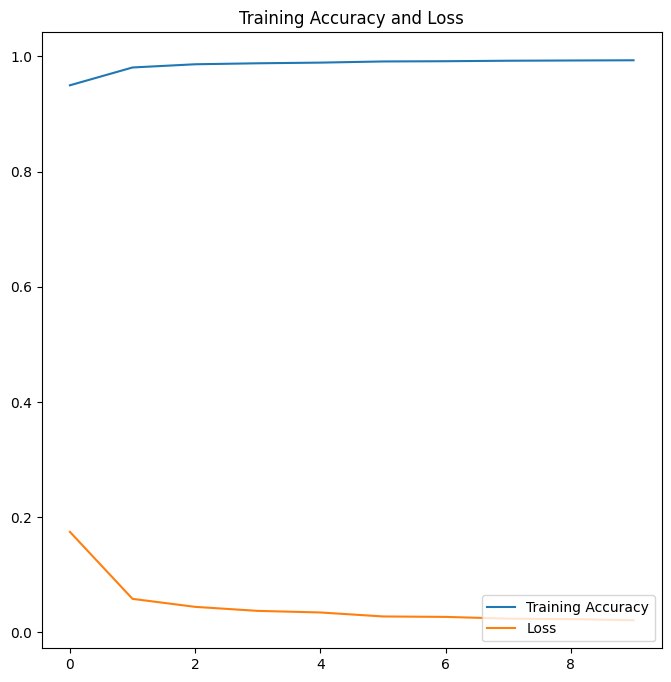

In [9]:
"""## Visualize Training Results"""

acc = history.history['accuracy']
loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')

Prediction of model: 0
Prediction of model: 0


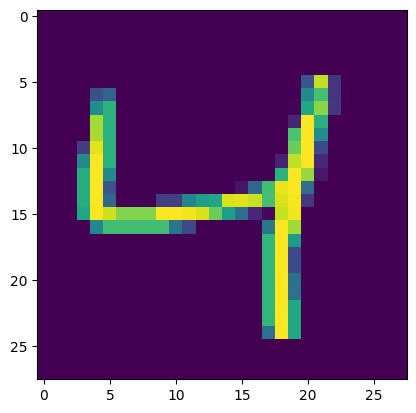

In [15]:
#test image
image = (train_images[1]).reshape(1,28,28,1)
predict_classes=model.predict(image, verbose=0) 
model_pred=np.argmax(predict_classes,axis=1)

plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

image = (train_images[2]).reshape(1,28,28,1)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))


Test images array shape: (4, 28, 28)
1/1 [==============================] - 0s 19ms/step
Predicted digit: 2
1/1 [==============================] - 0s 16ms/step
Predicted digit: 1
1/1 [==============================] - 0s 16ms/step
Predicted digit: 0
1/1 [==============================] - 0s 18ms/step
Predicted digit: 4


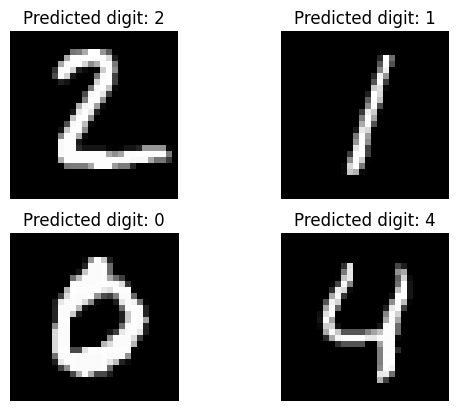

1/1 [==============================] - 0s 17ms/step
Prediction of model: 0


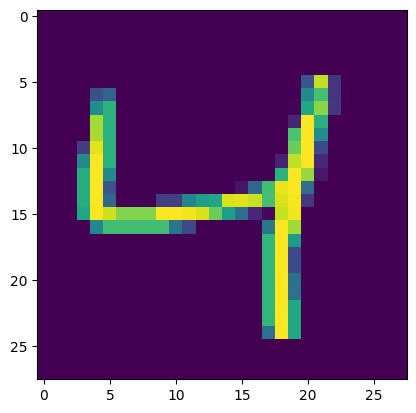

In [21]:
#test multiple images and saving the model
images = test_images[1:5]
images = images.reshape(images.shape[0], 28, 28)
print ("Test images array shape: {}".format(images.shape))


for i, test_image in enumerate(images, start=1):

    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = np.argmax(model.predict(test_image), axis=-1)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

"""## Save Model"""

model.save("cnn-model.h5")

"""## Load Model"""

loaded_model = models.load_model("cnn-model.h5")

image = (train_images[2]).reshape(1,28,28,1)
model_predict = np.argmax(model.predict(test_image), axis=1)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))